In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
def plot_scaling(csv_path, filter_map, show_speedup=True, save=False, filename=None):
    """
    Plot execution time or speedup vs number of threads (CPU) or threads per block (GPU),
    filtered by executable(s) and input file(s).
    
    Args:
        csv_path (str): Path to the CSV file.
        filter_map (dict): Dictionary {column -> list_of_values} for filtering the dataset.
            Example (CPU): {
                'Num Threads': [1, 2, 4, 8],
                'Input File': ['file1.txt'],
                'Executable': ['prog1.exe']
            }
            Example (GPU): {
                'Threads per Block': [32, 64, 128],
                'Input File': ['file1.txt'],
                'Executable': ['prog1.exe']
            }
        show_speedup (bool): If True, plot speedup instead of execution time.
        save (bool): If True, save the plot under ../plots/.
        filename (str): Optional custom filename for the saved plot.
    """
    # Load CSV
    df = pd.read_csv(csv_path)
    
    # Strip whitespace from strings
    df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    
    # Required columns
    required_cols = {"Executable", "Input File", "Avg Execution Time (ms)"}
    missing_required = required_cols - set(df.columns)
    if missing_required:
        raise ValueError(f"CSV is missing required columns: {missing_required}")
    
    # Decide CPU/GPU mode based on filter_map
    cpu_key = "Num Threads"
    gpu_key = "Threads per Block"
    has_cpu = cpu_key in filter_map
    has_gpu = gpu_key in filter_map
    
    if has_cpu and has_gpu:
        raise ValueError("Filter map cannot contain both 'Num Threads' and 'Threads per Block'.")
    elif has_cpu:
        if cpu_key not in df.columns:
            raise ValueError(f"Column '{cpu_key}' not found in CSV.")
        x_col = cpu_key
        xlabel = "Number of Threads"
        mode = "cpu"
    elif has_gpu:
        if gpu_key not in df.columns:
            raise ValueError(f"Column '{gpu_key}' not found in CSV.")
        x_col = gpu_key
        xlabel = "Threads per Block"
        mode = "gpu"
    else:
        raise ValueError("Filter map must contain either 'Num Threads' or 'Threads per Block'.")
    
    # Validate all filter_map keys exist in CSV
    invalid_keys = [col for col in filter_map if col not in df.columns]
    if invalid_keys:
        raise ValueError(f"Filter map contains invalid column(s): {invalid_keys}")
    
    # Ensure numeric type for x_col
    df[x_col] = df[x_col].astype(int)
    # Apply filters
    for col, values in filter_map.items():
        df = df[df[col].isin(values)]
    
    if df.empty:
        raise ValueError("No rows match the provided filters.")
    
    plt.figure(figsize=(10, 6))
    
    # Iterate over each executable and input file
    for exe in df['Executable'].unique():
        for file in df['Input File'].unique():
            subset = df[(df['Executable'] == exe) & (df['Input File'] == file)]
            subset = subset.sort_values(x_col)
            
            if subset.empty:
                continue
            
            x = subset[x_col]
            y = subset['Avg Execution Time (ms)']
            
            if show_speedup:
                baseline = y.iloc[0]
                y = baseline / y
            
            label = f"{exe} - {file}"
            plt.plot(x, y, marker='o', label=label)
    
    # Force all available values as x-axis ticks
    all_x = sorted(df[x_col].unique())
    plt.xticks(all_x)
    
    plt.xlabel(xlabel)
    plt.ylabel("Speedup" if show_speedup else "Avg Execution Time (ms)")
    plt.title(f"Performance Plot ({'Speedup' if show_speedup else 'Avg Execution Time'}) [{mode.upper()}]")
    plt.legend()
    plt.grid(True)
    
    if save:
        # Create ../plots folder if it does not exist
        output_dir = os.path.join(os.path.dirname(csv_path), "..", "plots")
        os.makedirs(output_dir, exist_ok=True)
        
        # Choose filename based on mode
        speed_mode = "speedup" if show_speedup else "execution_time"
        filename = f"{mode}_{speed_mode}_plot.png" if filename is None else filename
        filepath = os.path.join(output_dir, filename)
        
        plt.savefig(filepath, bbox_inches="tight")
        print(f"Plot saved to {filepath}")
    else:
        plt.show()

Plot saved to ../tables\..\plots\exec_time_DTF_vanilla_small.png


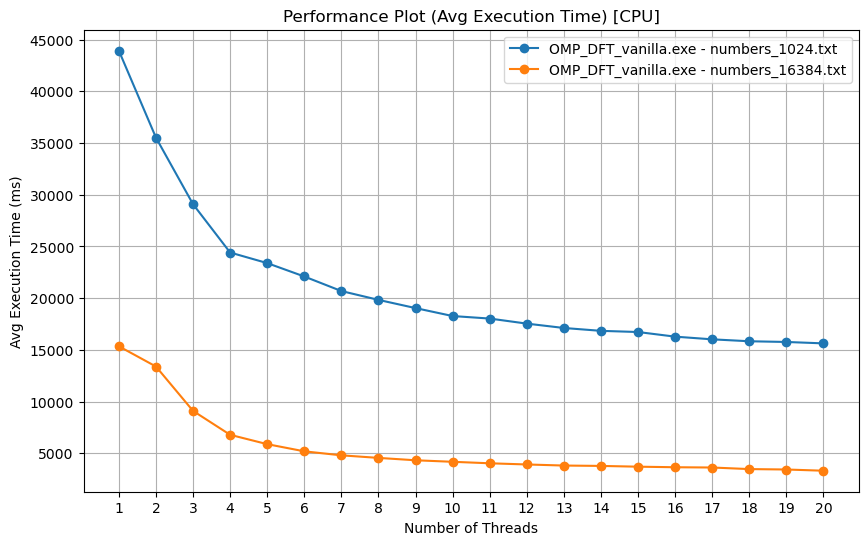

In [38]:
plot_scaling(
    "../tables/CPU_means.csv",
    filter_map={
        'Num Threads': [i for i in range(1, 21)],
        'Input File': ['numbers_1024.txt','numbers_16384.txt'],
        'Executable': ['OMP_DFT_vanilla.exe']
    },
    show_speedup=False,
    save=True,
    filename="exec_time_DTF_vanilla_small.png"
)

Plot saved to ../tables\..\plots\exec_time_DTF_vanilla_large.png


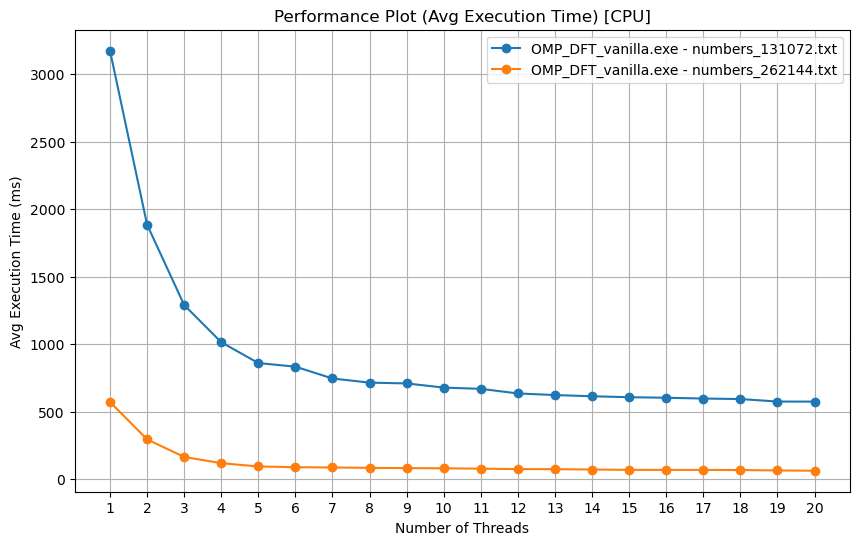

In [39]:
plot_scaling(
    "../tables/CPU_means.csv",
    filter_map={
        'Num Threads': [i for i in range(1, 21)],
        'Input File': ['numbers_131072.txt', 'numbers_262144.txt'],
        'Executable': ['OMP_DFT_vanilla.exe']
    },
    show_speedup=False,
    save=True,
    filename="exec_time_DTF_vanilla_large.png"
)

Plot saved to ../tables\..\plots\speedup_DTF_vanilla.png


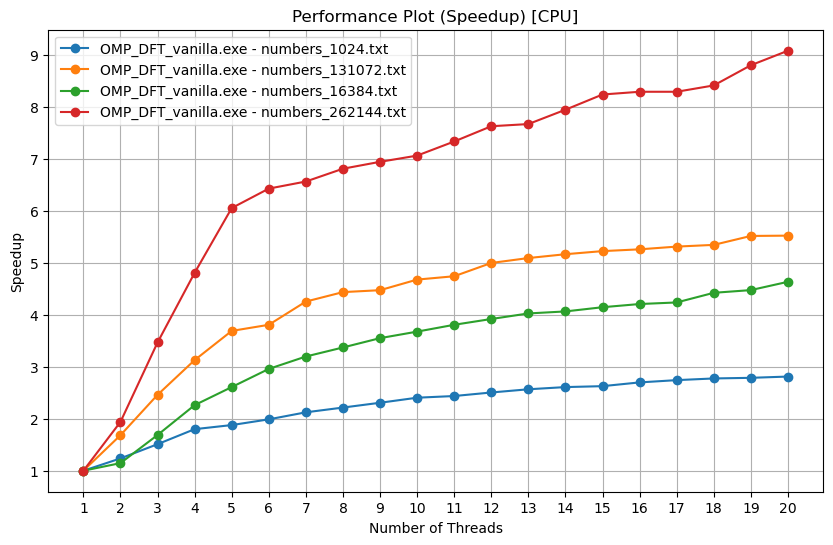

In [40]:
plot_scaling(
    "../tables/CPU_means.csv",
    filter_map={
        'Num Threads': [i for i in range(1, 21)],
        'Input File': ['numbers_1024.txt','numbers_16384.txt', 'numbers_131072.txt', 'numbers_262144.txt'],
        'Executable': ['OMP_DFT_vanilla.exe']
    },
    show_speedup=True,
    save=True,
    filename="speedup_DTF_vanilla.png"
)

Plot saved to ../tables\..\plots\exec_time_DTF_optimized_small.png


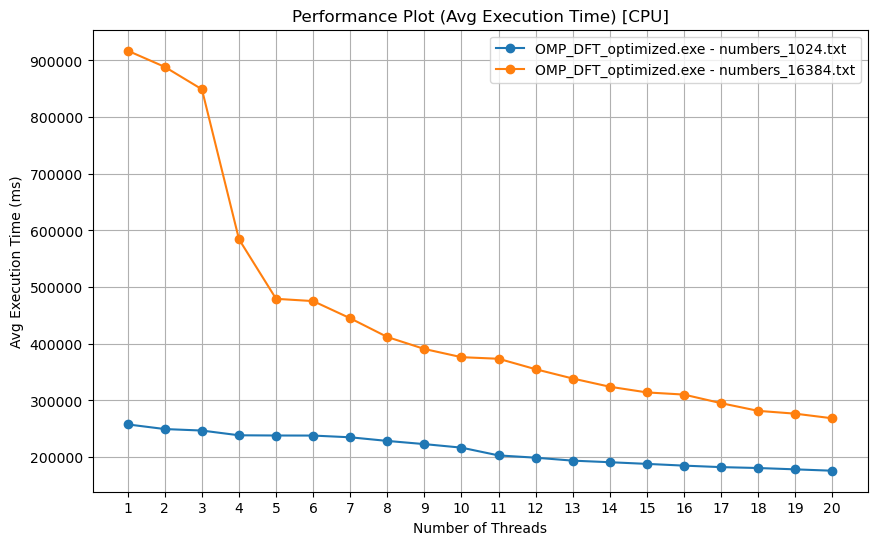

In [41]:
plot_scaling(
    "../tables/CPU_means.csv",
    filter_map={
        'Num Threads': [i for i in range(1, 21)],
        'Input File': ['numbers_1024.txt','numbers_16384.txt'],
        'Executable': ['OMP_DFT_optimized.exe']
    },
    show_speedup=False,
    save=True,
    filename="exec_time_DTF_optimized_small.png"
)

Plot saved to ../tables\..\plots\exec_time_DTF_optimized_large.png


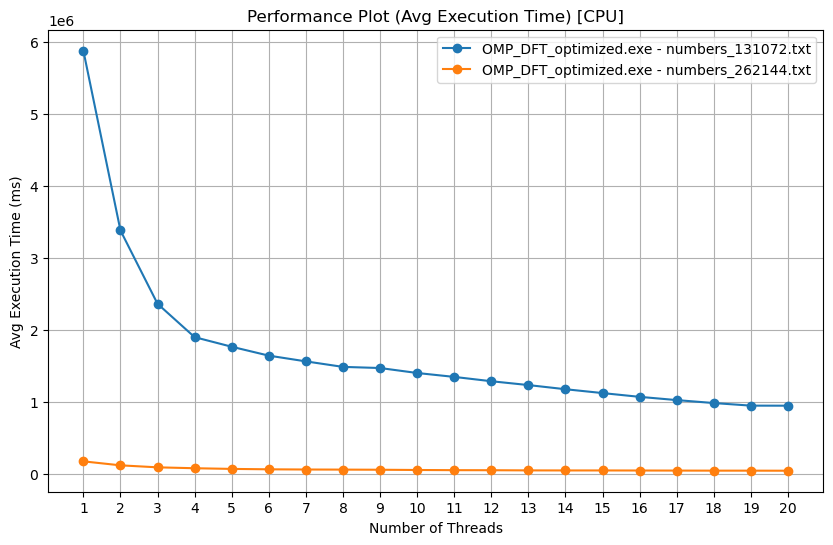

In [42]:
plot_scaling(
    "../tables/CPU_means.csv",
    filter_map={
        'Num Threads': [i for i in range(1, 21)],
        'Input File': ['numbers_131072.txt', 'numbers_262144.txt'],
        'Executable': ['OMP_DFT_optimized.exe']
    },
    show_speedup=False,
    save=True,
    filename="exec_time_DTF_optimized_large.png"
)

Plot saved to ../tables\..\plots\speedup_DTF_optimized.png


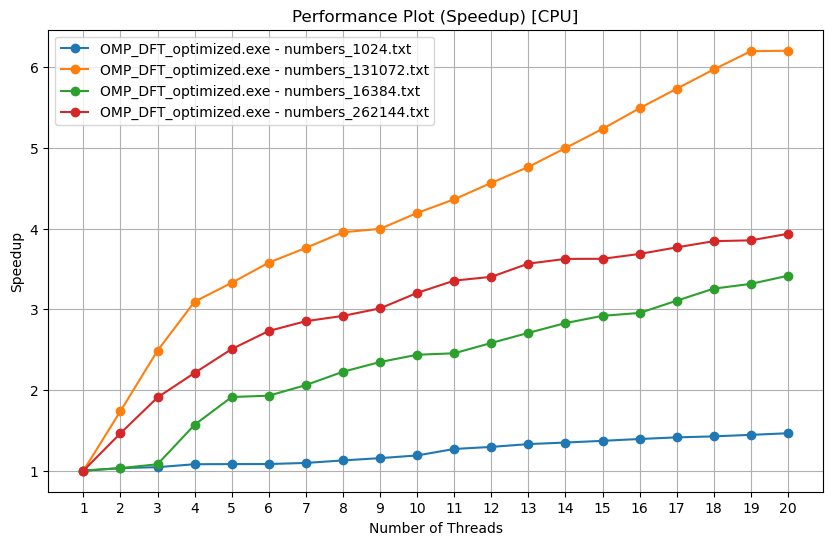

In [43]:
plot_scaling(
    "../tables/CPU_means.csv",
    filter_map={
        'Num Threads': [i for i in range(1, 21)],
        'Input File': ['numbers_1024.txt','numbers_16384.txt', 'numbers_131072.txt', 'numbers_262144.txt'],
        'Executable': ['OMP_DFT_optimized.exe']
    },
    show_speedup=True,
    save=True,
    filename="speedup_DTF_optimized.png"
)

Plot saved to ../tables\..\plots\exec_time_FFT.png


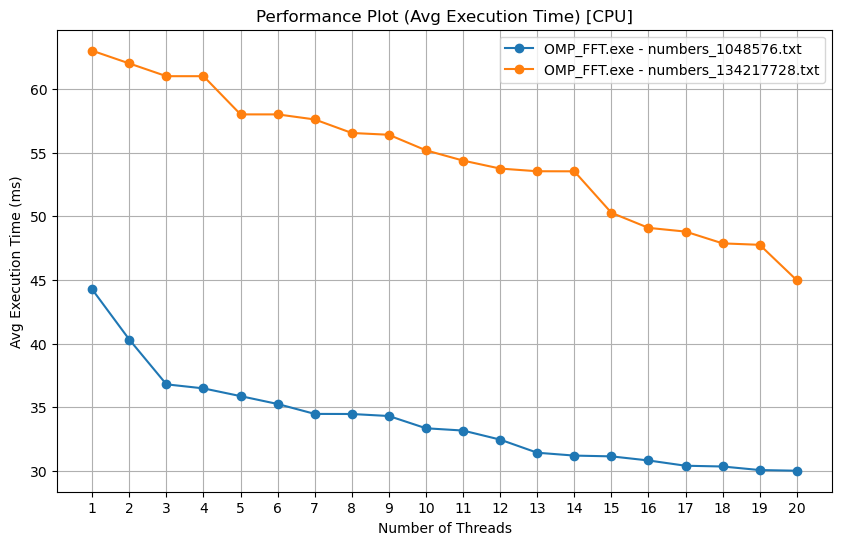

In [44]:
plot_scaling(
    "../tables/CPU_means.csv",
    filter_map={
        'Num Threads': [i for i in range(1, 21)],
        'Input File': ['numbers_1048576.txt','numbers_134217728.txt'],
        'Executable': ['OMP_FFT.exe']
    },
    show_speedup=False,
    save=True,
    filename="exec_time_FFT.png"
)

Plot saved to ../tables\..\plots\speedup_FFT.png


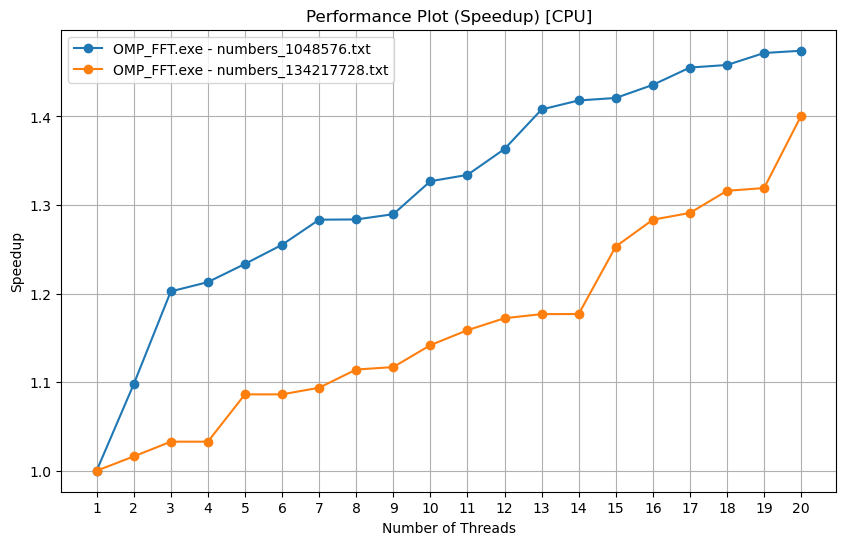

In [45]:
plot_scaling(
    "../tables/CPU_means.csv",
    filter_map={
        'Num Threads': [i for i in range(1, 21)],
        'Input File': ['numbers_1048576.txt','numbers_134217728.txt'],
        'Executable': ['OMP_FFT.exe']
    },
    show_speedup=True,
    save=True,
    filename="speedup_FFT.png"
)

Plot saved to ../tables\..\plots\exec_time_CUDA_FFT_NOE_small.png


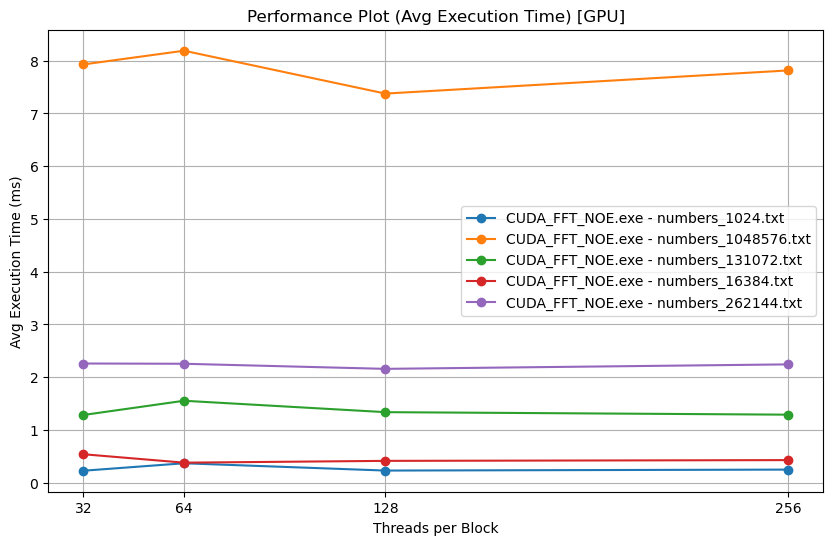

In [57]:
plot_scaling(
    "../tables/GPU_means.csv",
    filter_map={
        'Threads per Block': [32, 64, 128, 256],
        'Input File': ['numbers_1024.txt','numbers_16384.txt', 'numbers_131072.txt', 'numbers_262144.txt', 'numbers_1048576.txt'],
        'Executable': ['CUDA_FFT_NOE.exe']
    },
    show_speedup=False,
    save=True,
    filename="exec_time_CUDA_FFT_NOE_small.png"
)

Plot saved to ../tables\..\plots\exec_time_CUDA_FFT_NOE_large.png


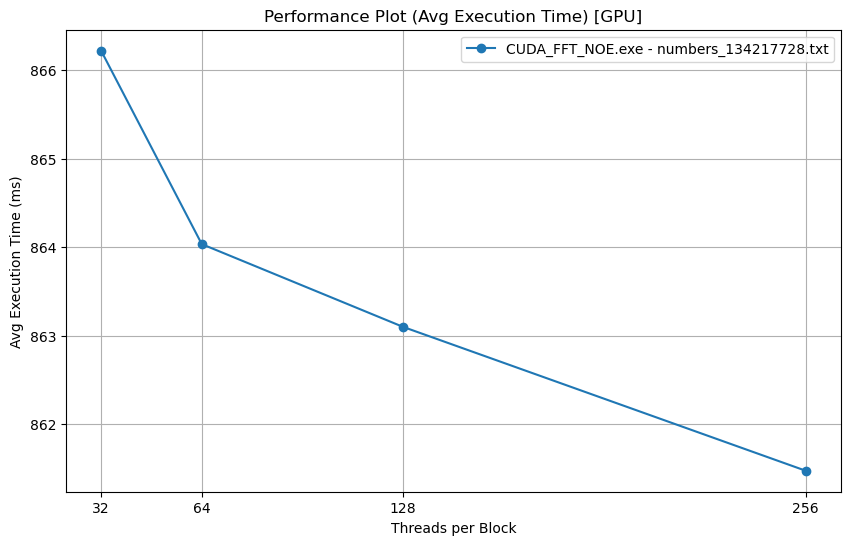

In [58]:
plot_scaling(
    "../tables/GPU_means.csv",
    filter_map={
        'Threads per Block': [32, 64, 128, 256],
        'Input File': ['numbers_134217728.txt'],
        'Executable': ['CUDA_FFT_NOE.exe']
    },
    show_speedup=False,
    save=True,
    filename="exec_time_CUDA_FFT_NOE_large.png"
)

Plot saved to ../tables\..\plots\speedup_CUDA_FFT_NOE.png


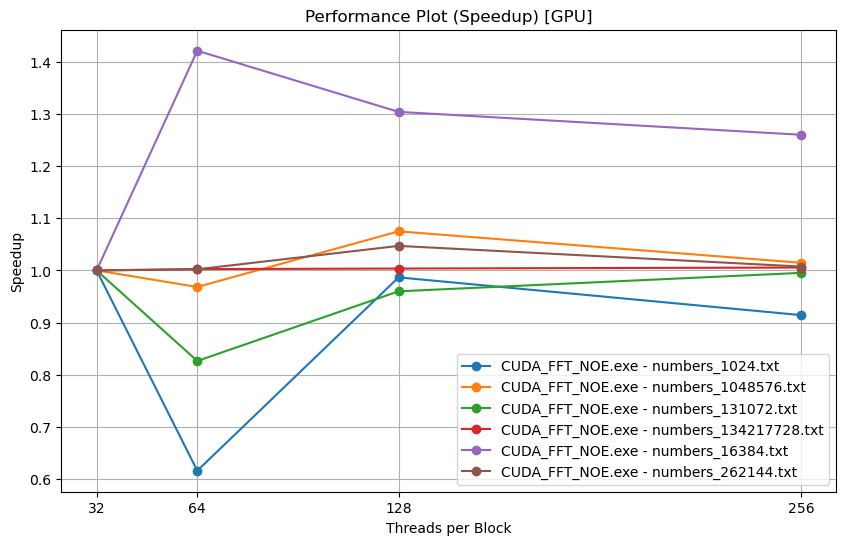

In [69]:
plot_scaling(
    "../tables/GPU_means.csv",
    filter_map={
        'Threads per Block': [32, 64, 128, 256],
        'Input File': ['numbers_1024.txt','numbers_16384.txt', 'numbers_131072.txt', 'numbers_262144.txt', 'numbers_1048576.txt', 'numbers_134217728.txt'],
        'Executable': ['CUDA_FFT_NOE.exe']
    },
    show_speedup=True,
    save=True,
    filename="speedup_CUDA_FFT_NOE.png",
)

Plot saved to ../tables\..\plots\exec_time_CUDA_FFT_NOE_large.png


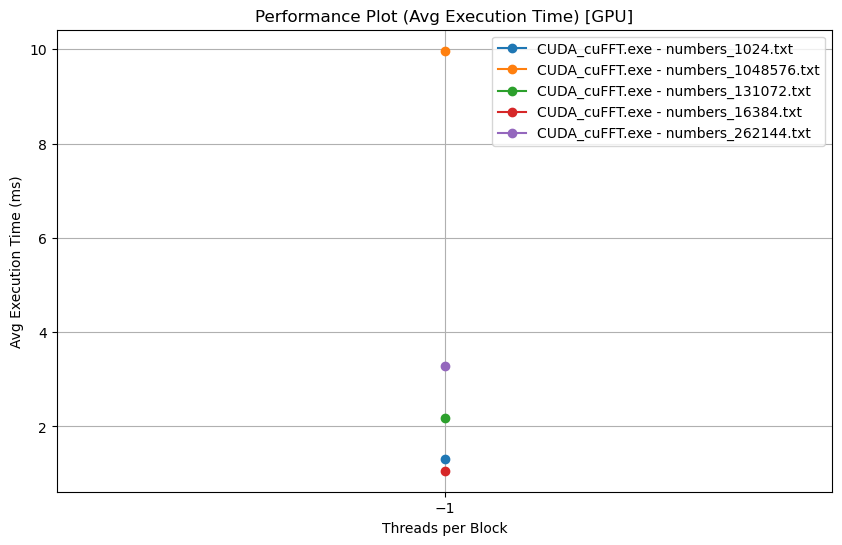

In [60]:
plot_scaling(
    "../tables/GPU_means.csv",
    filter_map={
        'Threads per Block': [-1],
        'Input File': ['numbers_1024.txt','numbers_16384.txt', 'numbers_131072.txt', 'numbers_262144.txt', 'numbers_1048576.txt'],
        'Executable': ['CUDA_cuFFT.exe']
    },
    show_speedup=False,
    save=True,
    filename="exec_time_CUDA_FFT_NOE_large.png"
)

Plot saved to ../tables\..\plots\exec_time_CUDA_FFT_NOE_large.png


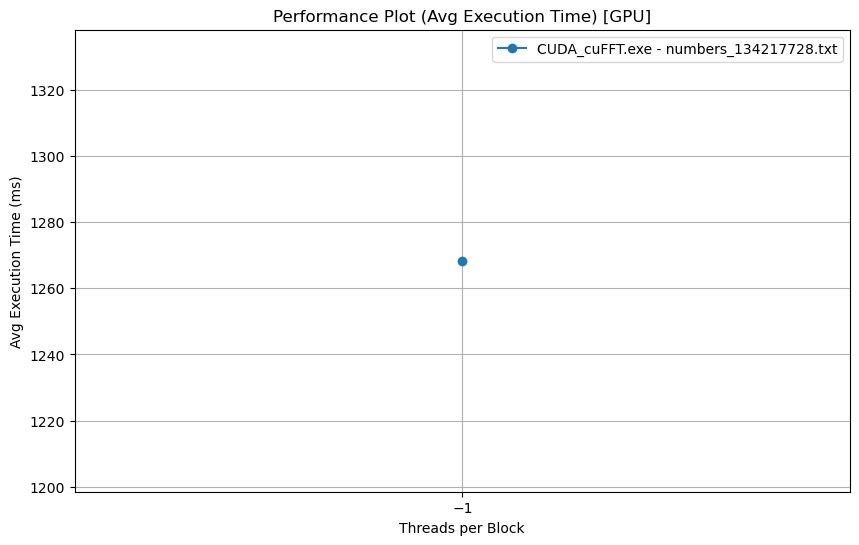

In [61]:
plot_scaling(
    "../tables/GPU_means.csv",
    filter_map={
        'Threads per Block': [-1],
        'Input File': ['numbers_134217728.txt'],
        'Executable': ['CUDA_cuFFT.exe']
    },
    show_speedup=False,
    save=True,
    filename="exec_time_CUDA_FFT_NOE_large.png"
)

Plot saved to ../tables\..\plots\exec_time_CUDA_fft_small.png


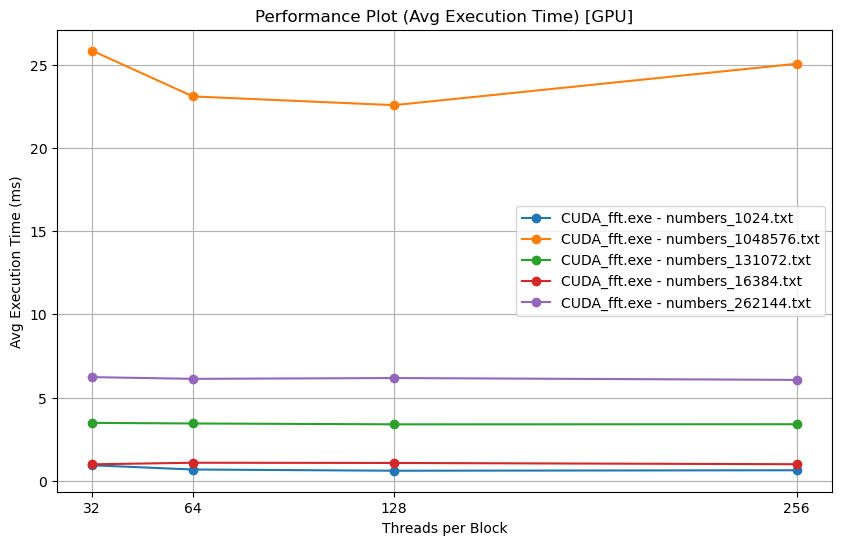

In [63]:
plot_scaling(
    "../tables/GPU_means.csv",
    filter_map={
        'Threads per Block': [32, 64, 128, 256],
        'Input File': ['numbers_1024.txt','numbers_16384.txt', 'numbers_131072.txt', 'numbers_262144.txt','numbers_1048576.txt'],
        'Executable': ['CUDA_fft.exe']
    },
    show_speedup=False,
    save=True,
    filename="exec_time_CUDA_fft_small.png"
)

Plot saved to ../tables\..\plots\exec_time_CUDA_fft_large.png


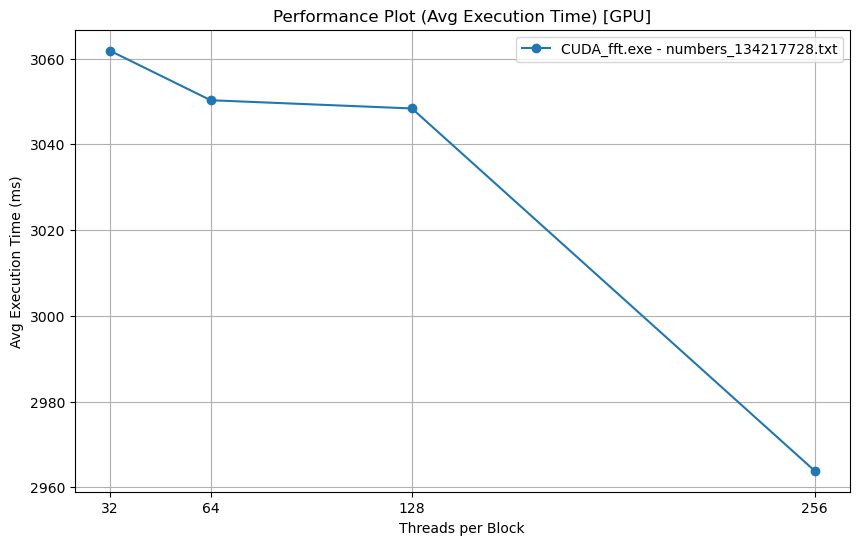

In [64]:
plot_scaling(
    "../tables/GPU_means.csv",
    filter_map={
        'Threads per Block': [32, 64, 128, 256],
        'Input File': ['numbers_134217728.txt'],
        'Executable': ['CUDA_fft.exe']
    },
    show_speedup=False,
    save=True,
    filename="exec_time_CUDA_fft_large.png"
)

Plot saved to ../tables\..\plots\speedup_CUDA_fft.png


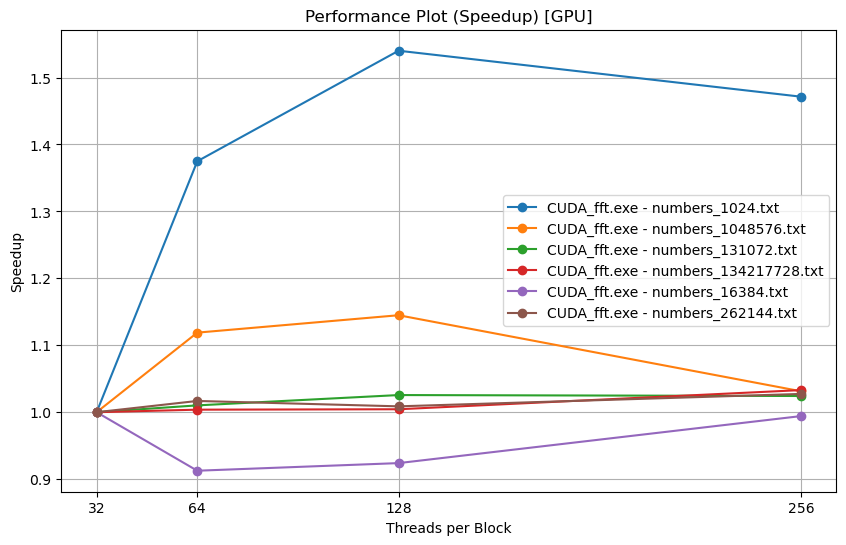

In [70]:
plot_scaling(
    "../tables/GPU_means.csv",
    filter_map={
        'Threads per Block': [32, 64, 128, 256],
        'Input File': ['numbers_1024.txt','numbers_16384.txt', 'numbers_131072.txt', 'numbers_262144.txt', 'numbers_1048576.txt', 'numbers_134217728.txt'],
        'Executable': ['CUDA_fft.exe']
    },
    show_speedup=True,
    save=True,
    filename="speedup_CUDA_fft.png",
)

Plot saved to ../tables\..\plots\exec_time_CUDA_dft_small.png


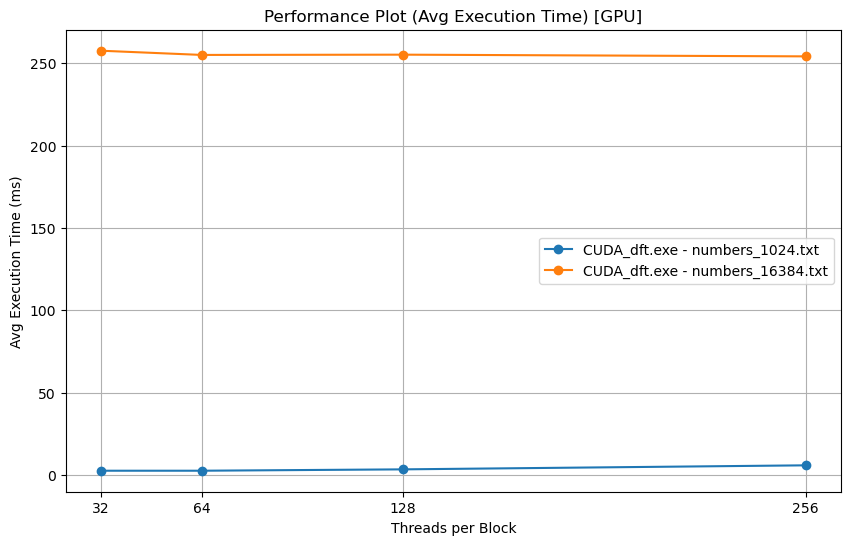

In [66]:
plot_scaling(
    "../tables/GPU_means.csv",
    filter_map={
        'Threads per Block': [32, 64, 128, 256],
        'Input File': ['numbers_1024.txt','numbers_16384.txt'],
        'Executable': ['CUDA_dft.exe']
    },
    show_speedup=False,
    save=True,
    filename="exec_time_CUDA_dft_small.png"
)

Plot saved to ../tables\..\plots\exec_time_CUDA_dft_small.png


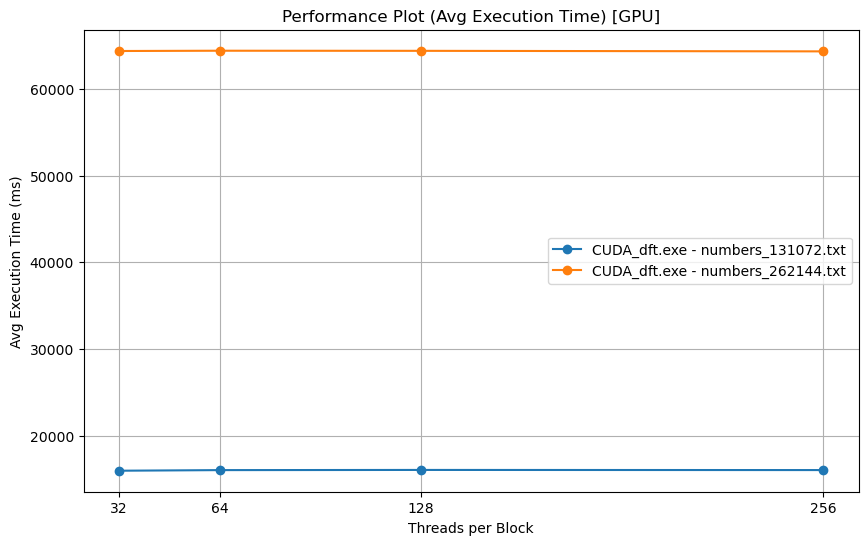

In [67]:
plot_scaling(
    "../tables/GPU_means.csv",
    filter_map={
        'Threads per Block': [32, 64, 128, 256],
        'Input File': ['numbers_131072.txt', 'numbers_262144.txt'],
        'Executable': ['CUDA_dft.exe']
    },
    show_speedup=False,
    save=True,
    filename="exec_time_CUDA_dft_small.png"
)

Plot saved to ../tables\..\plots\speedup_CUDA_dft.png


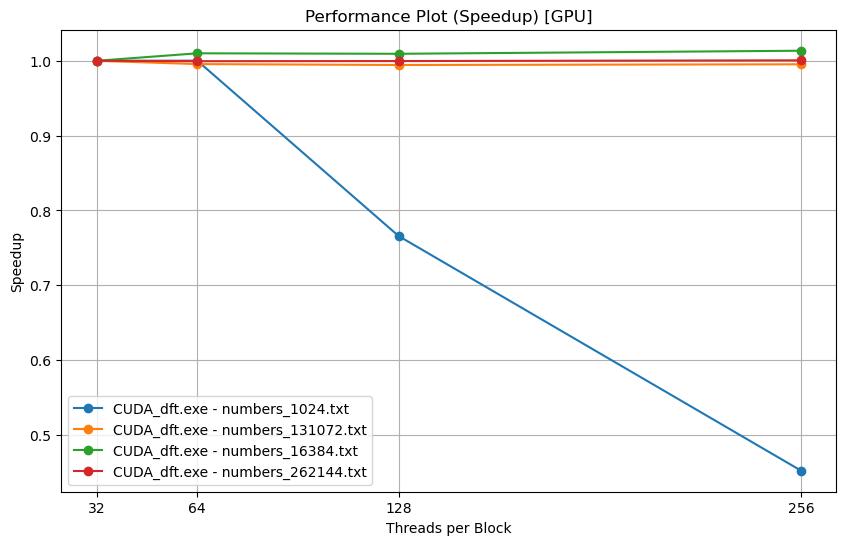

In [71]:
plot_scaling(
    "../tables/GPU_means.csv",
    filter_map={
        'Threads per Block': [32, 64, 128, 256],
        'Input File': ['numbers_1024.txt','numbers_16384.txt', 'numbers_131072.txt', 'numbers_262144.txt'],
        'Executable': ['CUDA_dft.exe']
    },
    show_speedup=True,
    save=True,
    filename="speedup_CUDA_dft.png",
)

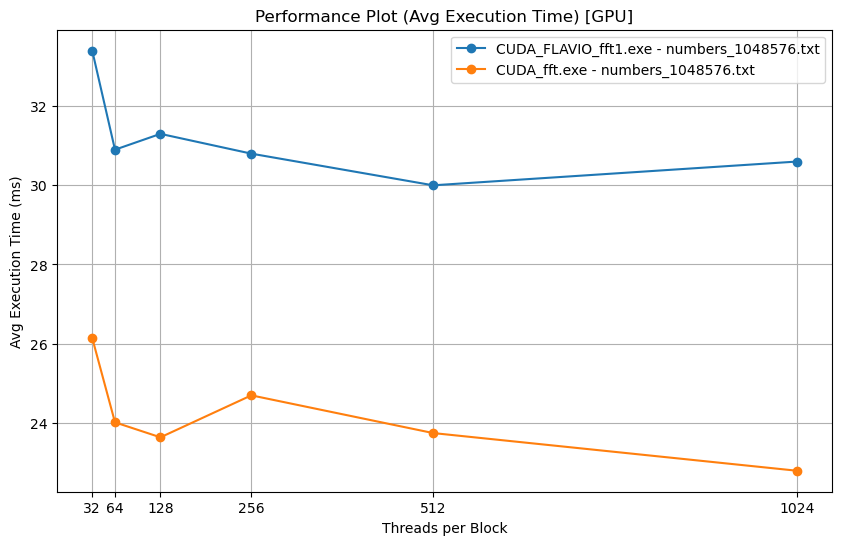

In [8]:
plot_scaling(
    "../tables/GPU_means.csv",
    filter_map={
        'Threads per Block': [32, 64, 128, 256, 512, 1024],
        'Input File': ['numbers_1048576.txt'],
        'Executable': ['CUDA_FLAVIO_fft1.exe', 'CUDA_fft.exe']
    },
    show_speedup=False,
    save=False,
)